In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline

import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
# from scipy.stats import norm
import matplotlib.mlab as mlab
# from pylab import rcParams


from root_numpy import root2array, tree2array,testdata
# from root_pandas import read_root
# from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
# from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
myfile_beam_off='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_EXTC1C2_hadd_hist.root'


In [4]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
folder_truth='TruthStudies'

TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"
TREE_EVENT_TRUTH="Eventtree"
TREE_MCPARTICLE_TRUTH="MCParticletree"
TREE_HIT="Hittree"
TREE_POT="potTree"

BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

In [5]:
# df_Event_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_EVENT]
# df_Sps_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_SPS]

# df_Event_beam_off= df_Event_beam_off.pandas.df()
# df_Sps_beam_off= df_Sps_beam_off.pandas.df()

df_Event_beam_off = pd.DataFrame( root2array( myfile_beam_off,BRANCH_EVT) )
df_Sps_beam_off = pd.DataFrame( root2array( myfile_beam_off,BRANCH_SPS) )

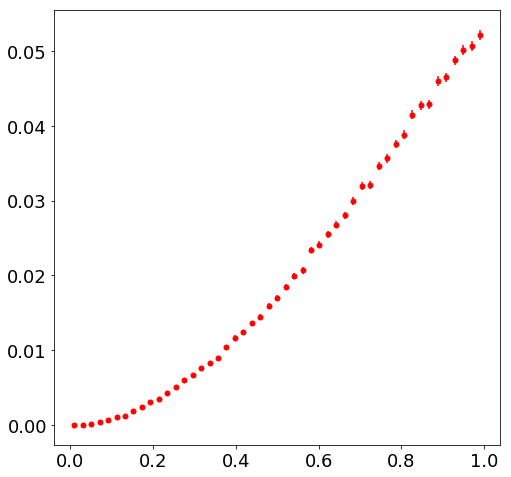

In [6]:
BINS = np.linspace(0,1.,50)

fig = plt.figure(figsize=(8,8))

binv, bine = np.histogram(df_Sps_beam_off['distance_rand_vtx'].values/100,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
NEVTS = df_Event_beam_off.shape[0]
binv /= NEVTS
errors /= NEVTS
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

plt.show()


BINWIDTH = binc[1]-binc[0]


In [7]:
def fun(x,c):
    return 4*pi*x*x*c*BINWIDTH
f2 = np.vectorize(fun)
fun(1.,1)

0.25645654315018723

In [8]:
guess = [0.23]

In [9]:
xvals = np.linspace(bine[0],bine[-1],100)

In [10]:
popt,popv = curve_fit(f2,binc,binv,p0=guess)

In [11]:
print popt

[0.23009049]


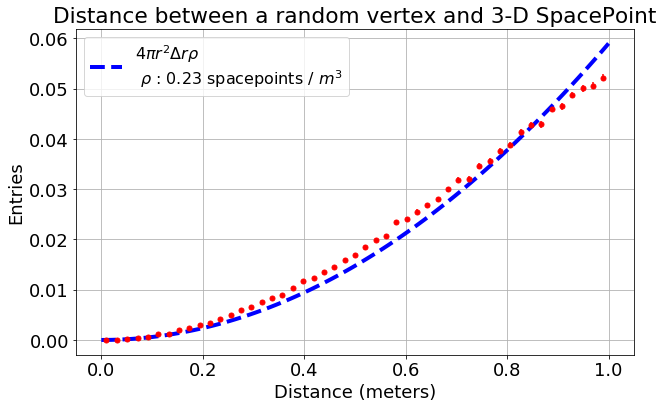

In [12]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
plt.plot(xvals,f2(xvals,*popt),'b--',lw=4,label='$4 \pi r^2 \Delta r \\rho $ \n $\\rho$ : %.02f spacepoints / $m^3$'%(popt[0]))
plt.grid()
plt.xlabel('Distance (meters)')
plt.ylabel('Entries')
plt.title("Distance between a random vertex and 3-D SpacePoint")
plt.legend(loc=2,fontsize=16)
plt.show()
# fig.savefig('curve.png', dpi=500)

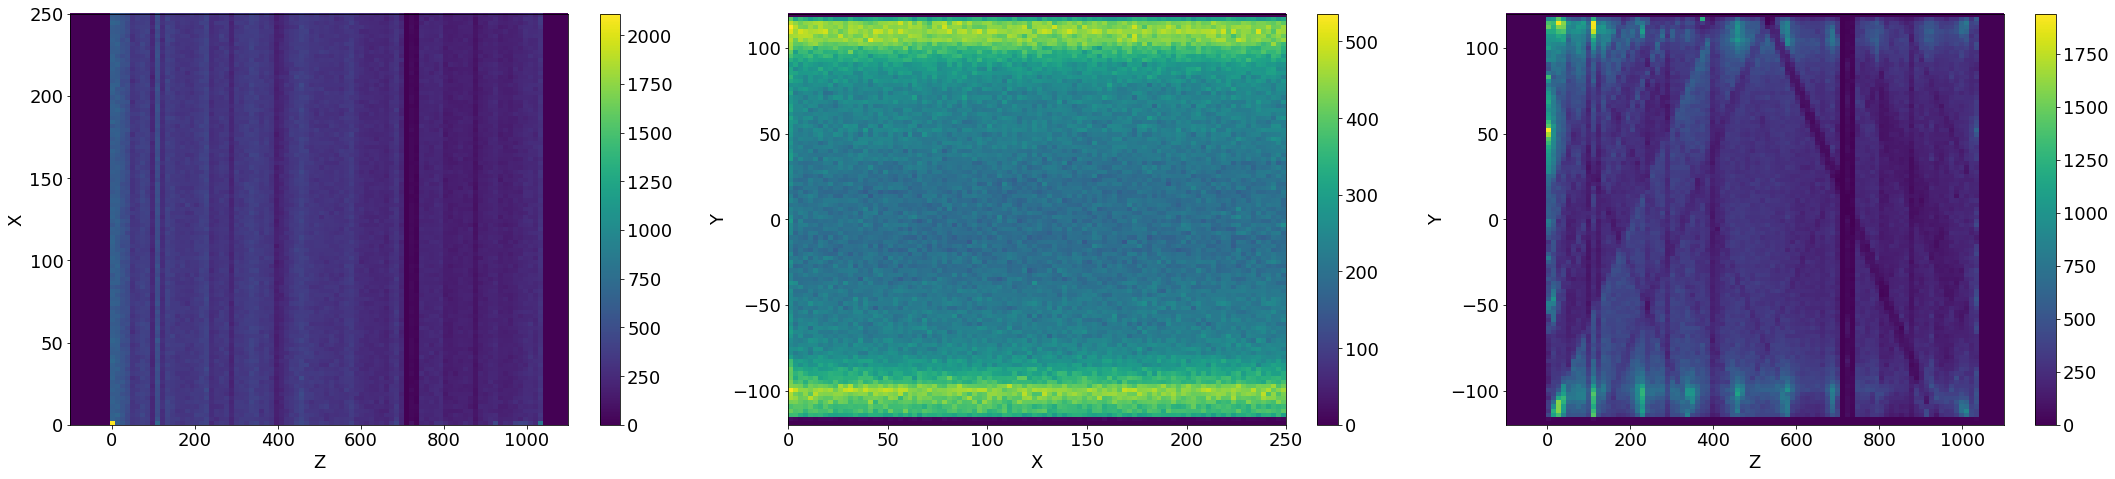

In [13]:
fig = plt.figure(figsize=(30,7))
plt.subplot(1, 3, 1)
plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.subplot(1, 3, 2)
plt.hist2d(df_Sps_beam_off['sps_x'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.show()
# fig.savefig('SpacePoint_ON_Beam', dpi=300)


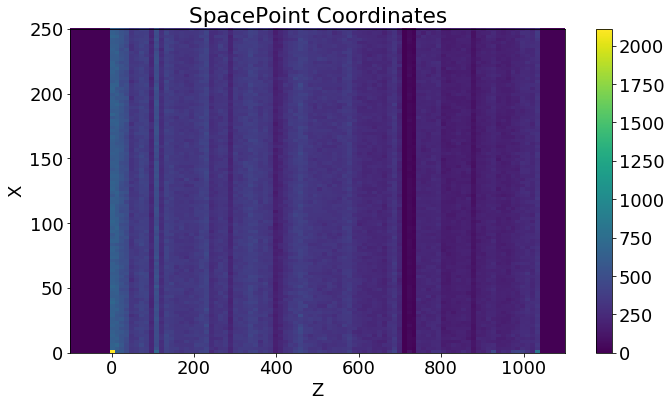

In [14]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.tight_layout()
plt.show()

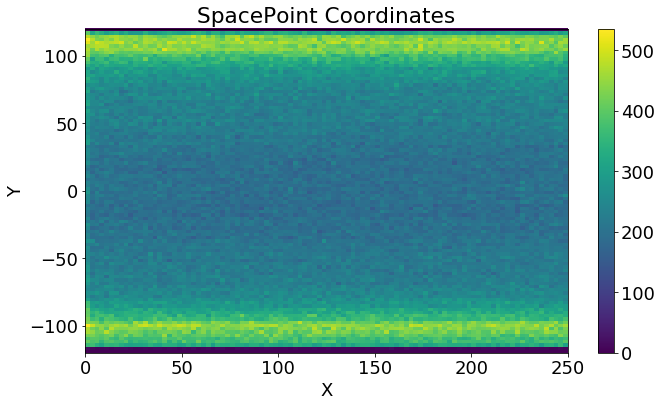

In [15]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off['sps_x'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,vmin=0, vmax=250)#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

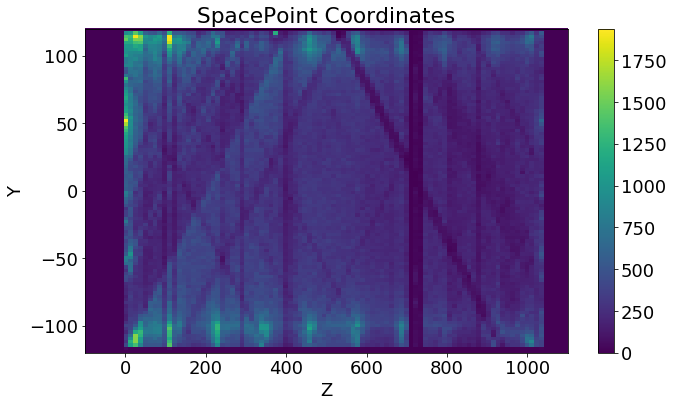

In [16]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

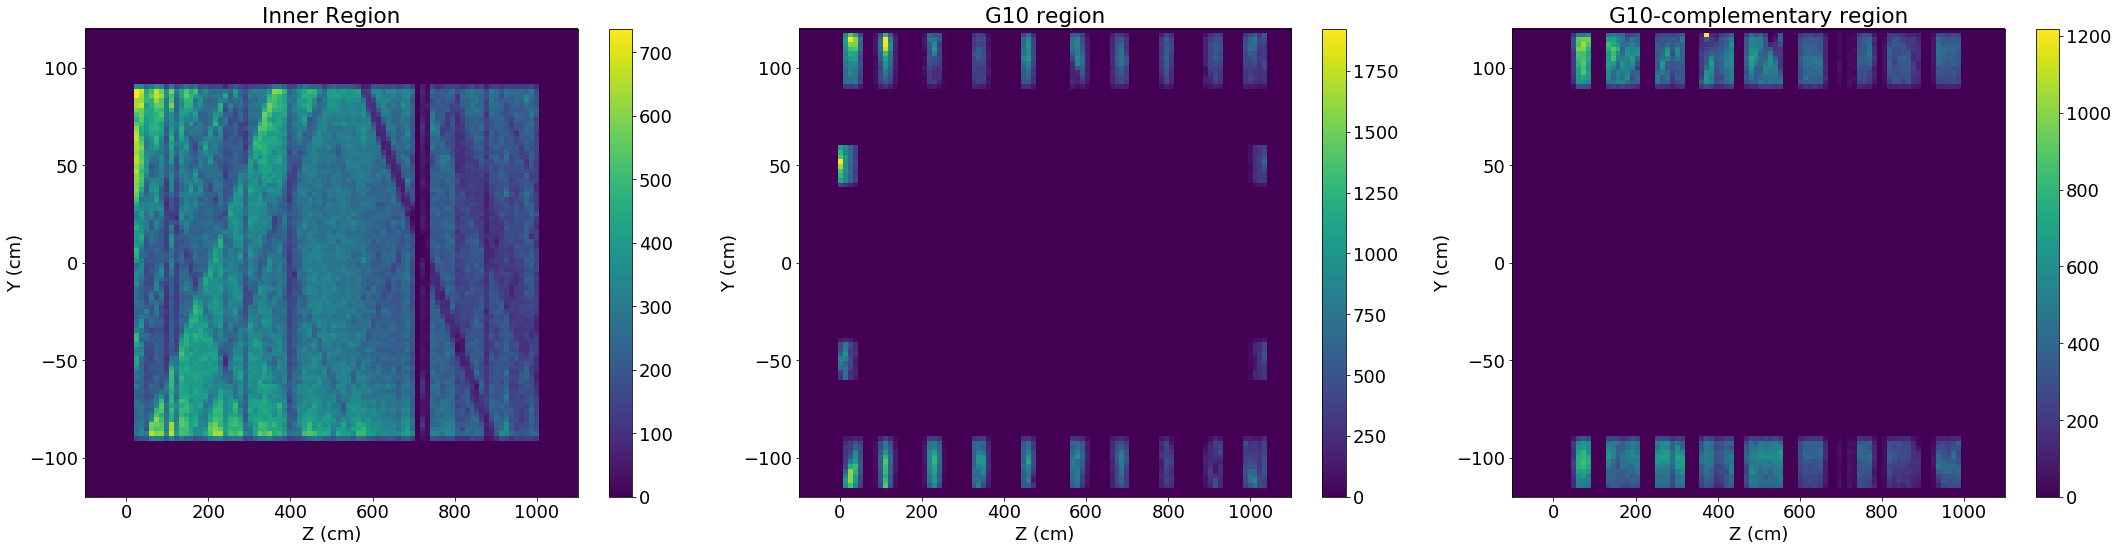

In [17]:
fig = plt.figure(figsize=(30,8))

G10_REGION='((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))'
INNER_REGION='(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000)'
COMPLEMENTARY_REGION= '((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  '

df_G10=df_Sps_beam_off.query(G10_REGION)
df_rest_det=df_Sps_beam_off.query(INNER_REGION)
df_G10_complementary=df_Sps_beam_off.query(COMPLEMENTARY_REGION)


plt.subplot(1, 3, 1)

plt.hist2d(df_rest_det['sps_z'].values,df_rest_det['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]])# ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Inner Region")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')


plt.subplot(1, 3, 2)

plt.hist2d(df_G10['sps_z'].values,df_G10['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]])# ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 region")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')

plt.subplot(1, 3, 3)

plt.hist2d(df_G10_complementary['sps_z'].values,df_G10_complementary['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]])# ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10-complementary region")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')


plt.tight_layout()
plt.show()
# fig.savefig('Isolation.png', dpi=400)

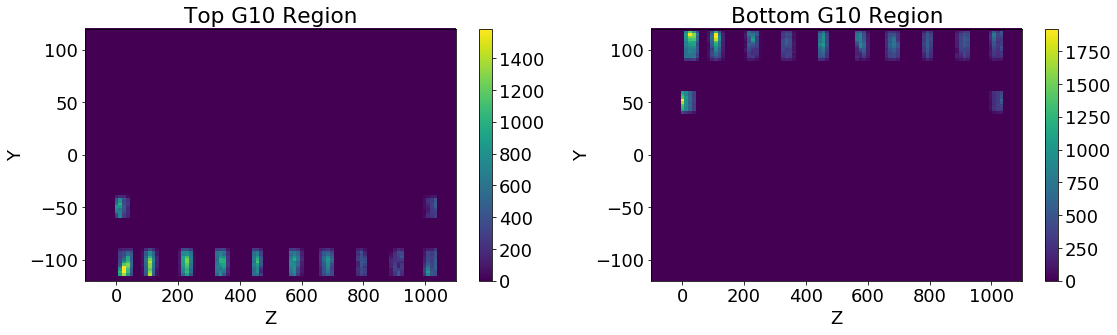

In [18]:
TOP='((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) '
BOTTOM='((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) '

df_G10_bottom=df_Sps_beam_off.query(BOTTOM)
df_G10_top=df_Sps_beam_off.query(TOP)

fig = plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.hist2d(df_G10_bottom['sps_z'].values,df_G10_bottom['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Top G10 Region")
plt.xlabel('Z')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.hist2d(df_G10_top['sps_z'].values,df_G10_top['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Bottom G10 Region")
plt.xlabel('Z')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

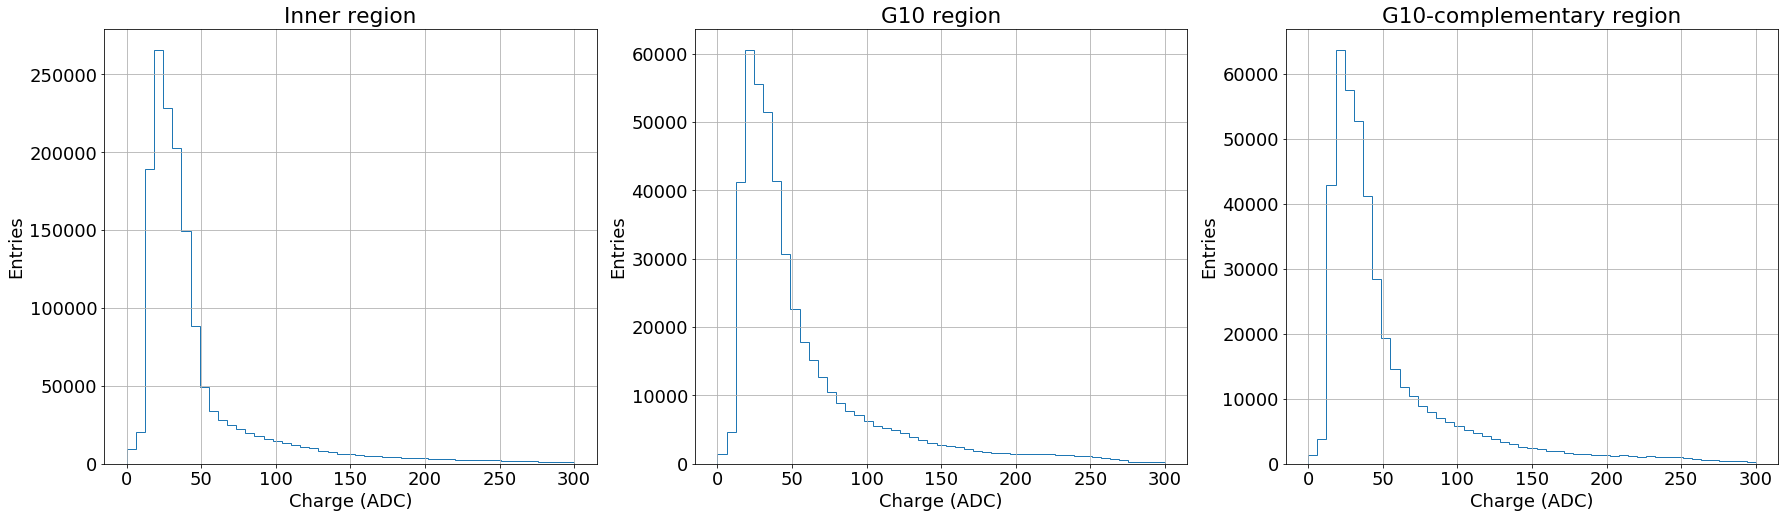

In [19]:
fig = plt.figure(figsize=(30,8))
BINS=np.linspace(0,300,50)
plt.subplot(1, 3, 1)
plt.hist(df_rest_det['sps_cluster_charge'].values,bins=BINS,histtype='step')
plt.title("Inner region")
plt.xlabel('Charge (ADC)')
plt.ylabel('Entries')
# plt.legend(loc=1)
plt.grid()
plt.subplot(1, 3, 2)
plt.hist(df_G10['sps_cluster_charge'].values,bins=BINS,histtype='step')
plt.title("G10 region")
plt.xlabel('Charge (ADC)')
plt.ylabel('Entries')
# plt.legend(loc=1)
plt.grid()
plt.subplot(1, 3, 3)
plt.hist(df_G10_complementary['sps_cluster_charge'].values,bins=BINS,histtype='step')
plt.title("G10-complementary region")
plt.xlabel('Charge (ADC)')
plt.ylabel('Entries')
# plt.legend(loc=1)
plt.grid()
plt.show()

In [20]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

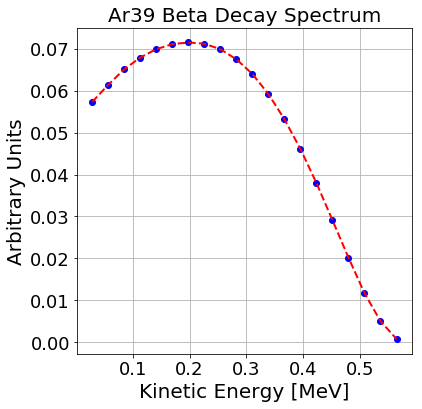

In [21]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

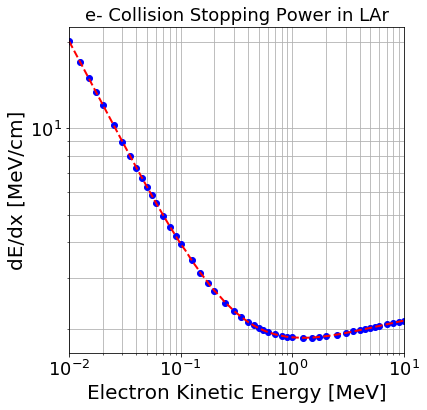

In [22]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

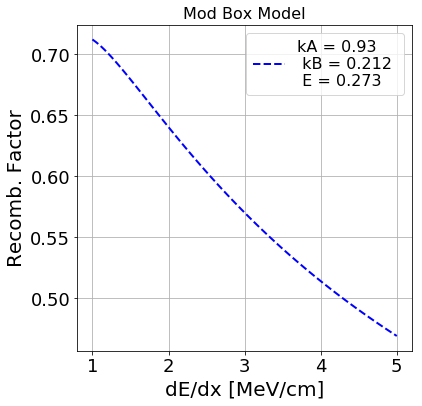

In [23]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

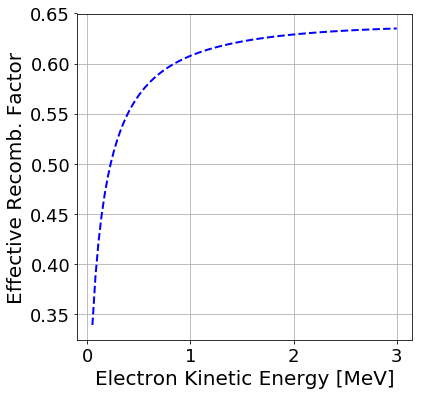

In [24]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



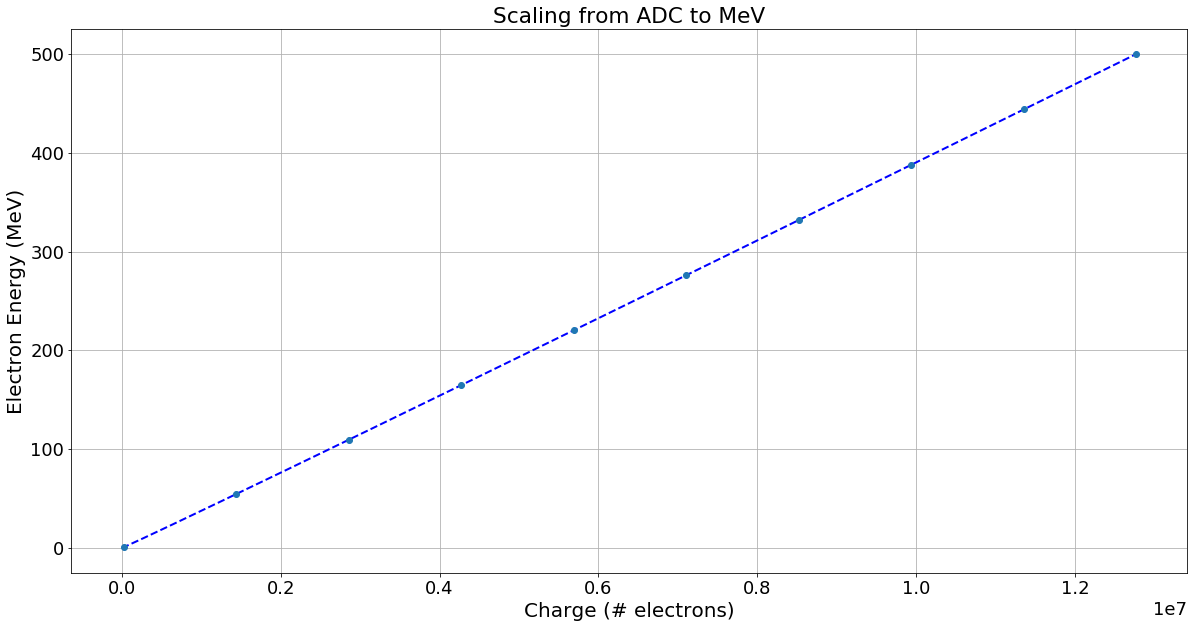

In [25]:
fig = plt.figure(figsize=(20,10))
Evals = np.linspace(0.001,500,500)
# Evals = np.linspace(0.001,30,500)

Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
# fig.savefig('Q2E.png', dpi=300)
# print (fQ2E(1425.54 * 238.4))
# print (fQ2E(521.225 * 238.4))
# print (fQ2E(2108.16 * 238.4))
# print (fQ2E(2026.97 * 238.4))
# print (fQ2E(1280.97 * 238.4))
# print (fQ2E(321.1692 * 238.4))



In [26]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.235963916302


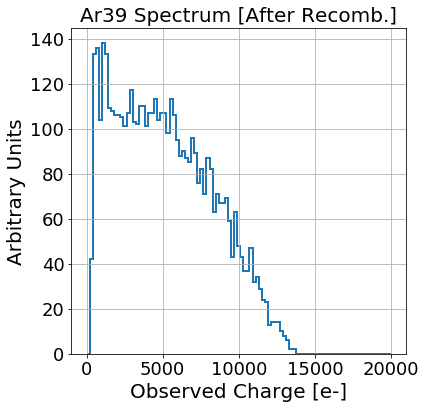

In [27]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [28]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

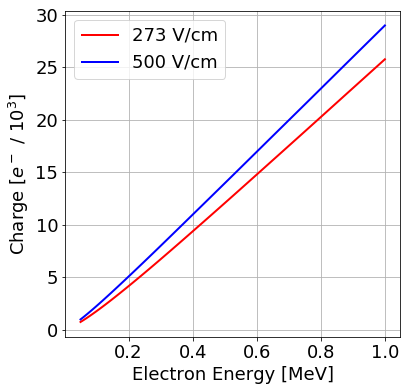

In [29]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [30]:
print Charge(0.2,0.273)

4129.221044959042


In [31]:
def E_recoY_off(df,gain):
    YQ_off = df['sps_cluster_charge50']
    QrecoY_off = YQ_off * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off = fQ2E(QrecoY_off)
    return ErecoY_off

def E_recoY_overlay(df,gain):
    YQ_overlay = df['sps_cluster_charge50']
    QrecoY_overlay = YQ_overlay * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay = fQ2E(QrecoY_overlay)
    return ErecoY_overlay


def E_recoY_off_sps(df,gain):
    YQ_off_sps = df['sps_cluster_charge']
    QrecoY_off_sps = YQ_off_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_sps = fQ2E(QrecoY_off_sps)
    return ErecoY_off_sps

def E_recoY_on_sps(df,gain):
    YQ_on_sps = df['sps_cluster_charge']
    QrecoY_on_sps = YQ_on_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on_sps = fQ2E(QrecoY_on_sps)
    return ErecoY_on_sps

def E_recoY_overlay_sps(df,gain):
    YQ_overlay_sps = df['sps_cluster_charge']
    QrecoY_overlay_sps = YQ_overlay_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay_sps = fQ2E(QrecoY_overlay_sps)
    return ErecoY_overlay_sps


def E_recoY_on(df,gain):
    YQ_on  = df['sps_cluster_charge50']
    QrecoY_on = YQ_on * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on = fQ2E(QrecoY_on)
    return ErecoY_on


In [32]:
df_G10_energy=df_G10.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_G10_energy['energy']=E_recoY_off_sps(df_G10_energy,238.4)

df_rest_det_energy=df_rest_det.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_rest_det_energy['energy']=E_recoY_off_sps(df_rest_det_energy,238.4)

df_G10_complementary_energy=df_G10_complementary.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.05')
df_G10_complementary_energy['energy']=E_recoY_off_sps(df_G10_complementary_energy,238.4)

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

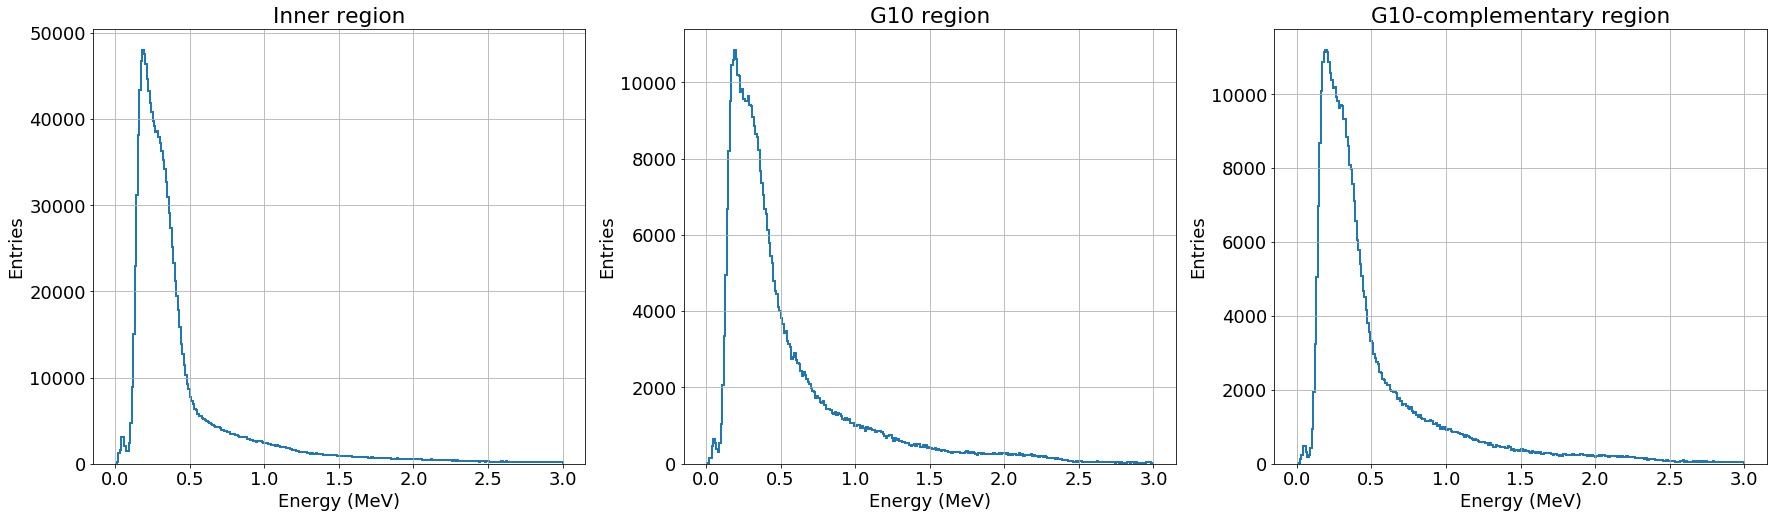

In [33]:
fig = plt.figure(figsize=(30,8))
BINS=np.linspace(0,3,300)
plt.subplot(1, 3, 1)
plt.hist(df_rest_det_energy['energy'].values,bins=BINS,histtype='step',lw=2)
plt.title("Inner region")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
# plt.legend(loc=1)
plt.grid()
plt.subplot(1, 3, 2)
plt.hist(df_G10_energy['energy'].values,bins=BINS,histtype='step',lw=2)
plt.title("G10 region")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
# plt.legend(loc=1)
plt.grid()
plt.subplot(1, 3, 3)
plt.hist(df_G10_complementary_energy['energy'].values,bins=BINS,histtype='step',lw=2)
plt.title("G10-complementary region")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
# plt.legend(loc=1)
plt.grid()
plt.show()

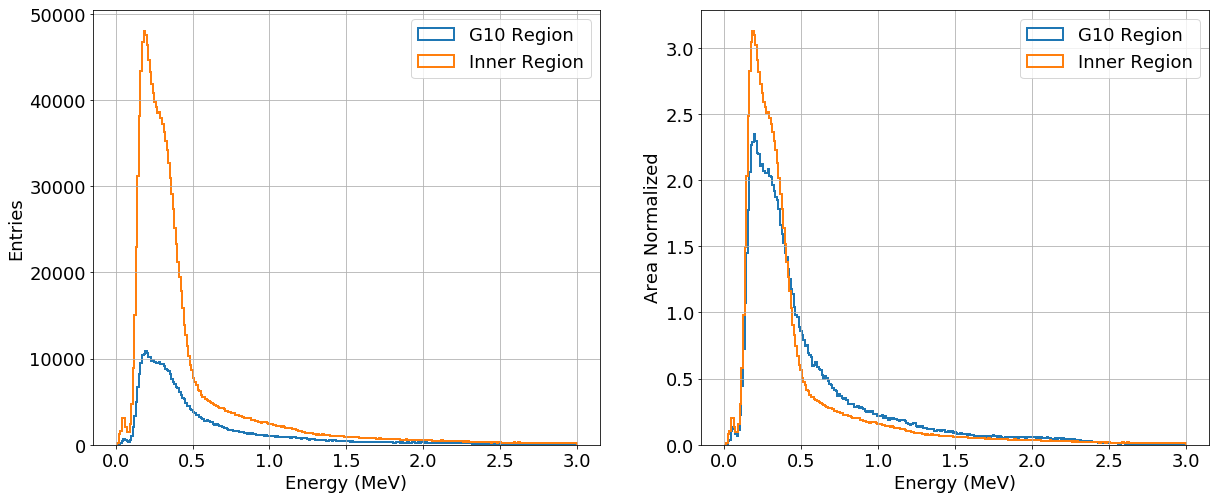

In [34]:
fig = plt.figure(figsize=(20,8))
BINS=np.linspace(0,3,300)
plt.subplot(1, 2, 1)
plt.hist(df_G10_energy['energy'].values,bins=BINS,histtype='step',lw=2,label='G10 Region')
plt.hist(df_rest_det_energy['energy'].values,bins=BINS,histtype='step',lw=2,label='Inner Region')
#plt.title("Inner region")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(df_G10_energy['energy'].values,bins=BINS,histtype='step',lw=2,density=True,label='G10 Region')
plt.hist(df_rest_det_energy['energy'].values,bins=BINS,histtype='step',lw=2,density=True,label='Inner Region')
#plt.title("G10 region")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)
plt.show()


In [35]:
#scaling_factor_new= (0.37864077669)

# scaling_factor_inner_region= (0.0714077669)
#Area of G10 region=(40*30)+(40*30)+(40*30)+(40*30)+(30*30)+(40*30)+(40*30)+(40*30)+(30*30)+(40*30)+(30*30)+(20*40)+(30*20)+(20*40)+(20*30)=15100
#                  =15100
#Area of inner region= (180 * 980) = 176400

scaling_factor_inner_region= 15100.0/176400.0
nRest_det = len(df_rest_det_energy)
weights_Rest_det = np.ones(nRest_det) * scaling_factor_inner_region # factor needed to scale off-beam to on-beam


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


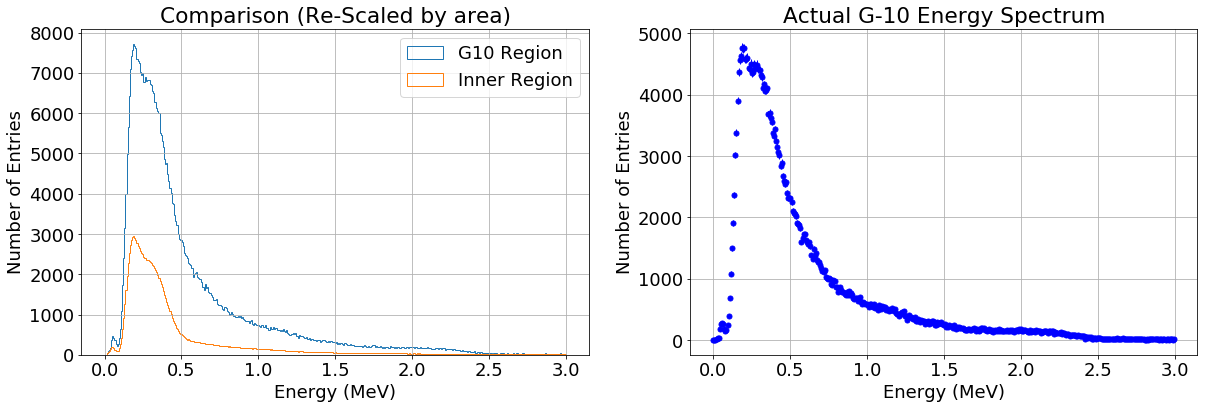

In [36]:
fig = plt.figure(figsize=(20,6))

BINS=np.linspace(0,3,420)
plt.subplot(1, 2, 1)


n1, bins1, p1 = plt.hist(df_G10_energy['energy'].values,bins=BINS,histtype='step',label='G10 Region',alpha=1,lw=1)
n2, bins2, p2 = plt.hist(df_rest_det_energy['energy'].values,bins=BINS,histtype='step',label='Inner Region',alpha=1,weights=weights_Rest_det,lw=1)

#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()
plt.title("Comparison (Re-Scaled by area)")
#plt.show()
plt.subplot(1, 2, 2)
binsc1 = 0.5*(bins1[:-1]+bins1[1:])
#fig = plt.figure(figsize=(10,6))
# plt.fill_between(binsc1,(n1-n2), alpha=0.8)

errors = np.sqrt(n1-n2)

plt.errorbar(binsc1,(n1-n2),yerr=errors,fmt='o',color='blue',markersize=5,lw=1)
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.grid()
plt.title("Actual G-10 Energy Spectrum")
plt.show()
#fig.savefig('Reweighted_comparison_combrest_det_energy

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


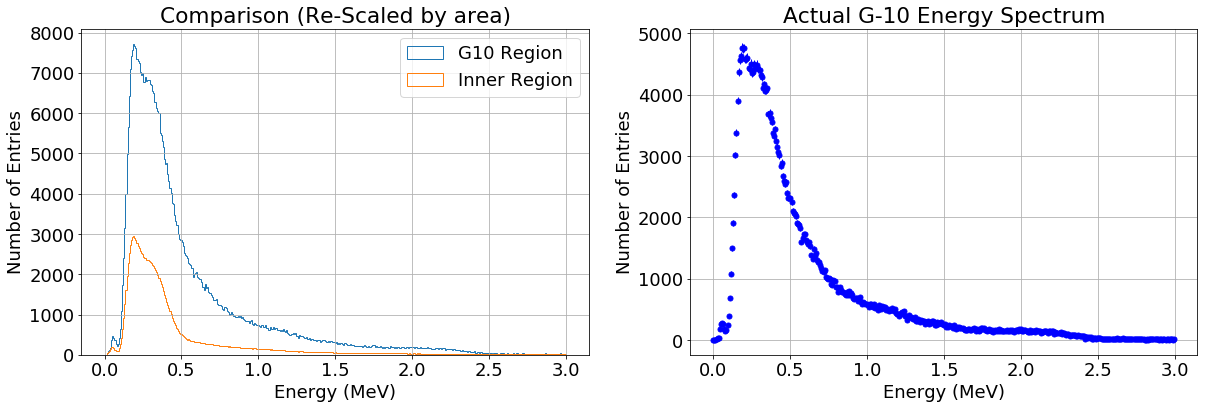

In [37]:
fig = plt.figure(figsize=(20,6))

BINS=np.linspace(0,3,420)
plt.subplot(1, 2, 1)


n1, bins1, p1 = plt.hist(df_G10_energy['energy'].values,bins=BINS,histtype='step',label='G10 Region',alpha=1,lw=1)
n2, bins2, p2 = plt.hist(df_rest_det_energy['energy'].values,bins=BINS,histtype='step',label='Inner Region',alpha=1,weights=weights_Rest_det,lw=1)

#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()
plt.title("Comparison (Re-Scaled by area)")
#plt.show()
plt.subplot(1, 2, 2)
binsc1 = 0.5*(bins1[:-1]+bins1[1:])
#fig = plt.figure(figsize=(10,6))
# plt.fill_between(binsc1,(n1-n2), alpha=0.8)

errors = np.sqrt(n1-n2)

plt.errorbar(binsc1,(n1-n2),yerr=errors,fmt='o',color='blue',markersize=5,lw=1)
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.grid()
plt.title("Actual G-10 Energy Spectrum")
plt.show()
#fig.savefig('Reweighted_comparison_combrest_det_energy

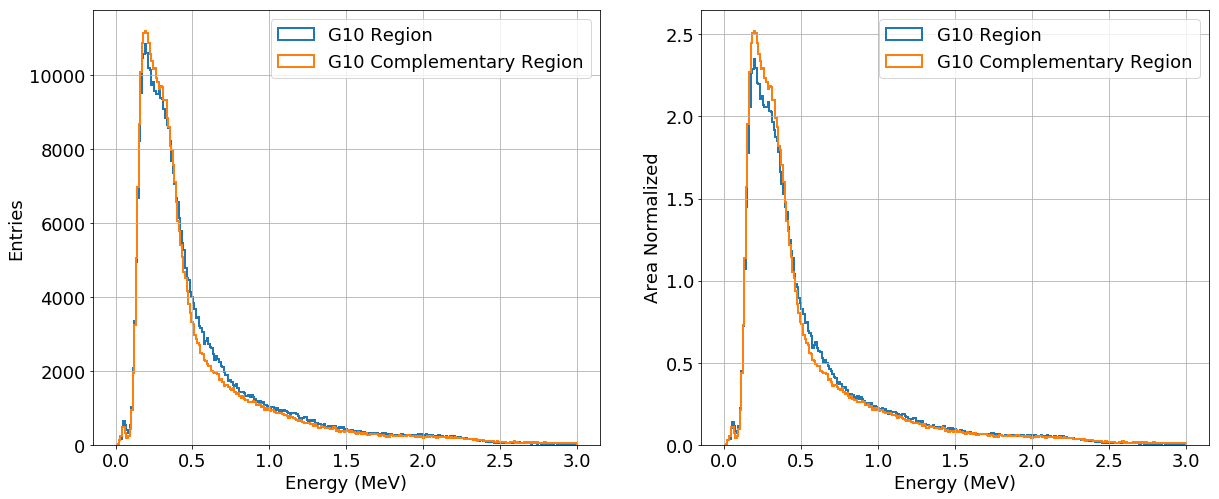

In [38]:
fig = plt.figure(figsize=(20,8))
BINS=np.linspace(0,3,300)
plt.subplot(1, 2, 1)
plt.hist(df_G10_energy['energy'].values,bins=BINS,histtype='step',lw=2,label='G10 Region')
plt.hist(df_G10_complementary_energy['energy'].values,bins=BINS,histtype='step',lw=2,label='G10 Complementary Region')
#plt.title("Inner region")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(df_G10_energy['energy'].values,bins=BINS,histtype='step',lw=2,density=True,label='G10 Region')
plt.hist(df_G10_complementary_energy['energy'].values,bins=BINS,histtype='step',lw=2,density=True,label='G10 Complementary Region')
#plt.title("G10 region")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)
plt.show()


In [39]:
scaling_factor_complementary= 0.609375
ncomplementary = len(df_G10_complementary_energy)
weights_complementary = np.ones(ncomplementary) * scaling_factor_complementary # factor needed to scale off-beam to on-beam


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


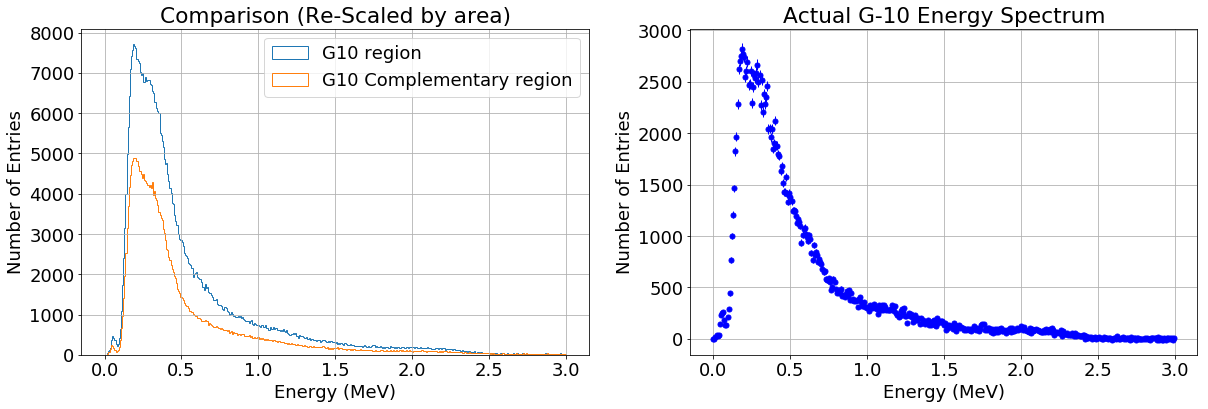

In [40]:
fig = plt.figure(figsize=(20,6))

BINS=np.linspace(0,3,420)
plt.subplot(1, 2, 1)


n1, bins1, p1 = plt.hist(df_G10_energy['energy'].values,bins=BINS,histtype='step',label='G10 region ',alpha=1,lw=1)
n2, bins2, p2 = plt.hist(df_G10_complementary_energy['energy'].values,bins=BINS,histtype='step',label='G10 Complementary region',alpha=1,weights=weights_complementary,lw=1)

#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()
plt.title("Comparison (Re-Scaled by area)")
#plt.show()
plt.subplot(1, 2, 2)
binsc1 = 0.5*(bins1[:-1]+bins1[1:])
#fig = plt.figure(figsize=(10,6))
# plt.fill_between(binsc1,(n1-n2), alpha=0.8)

errors = np.sqrt(n1-n2)

plt.errorbar(binsc1,(n1-n2),yerr=errors,fmt='o',color='blue',markersize=5,lw=1)
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.grid()
plt.title("Actual G-10 Energy Spectrum")
plt.show()
#fig.savefig('Reweighted_comparison_combined_new.png', dpi=400)


In [41]:
fig = plt.figure(figsize=(8,5))
# BINS=np.linspace(0,10000,100)
# plt.hist(df_Event_beam_off['N_Run'].values,histtype='step',label='Run Numbers',alpha=1,lw=2,bins=BINS)
# plt.show()
RUN_MIN=(df_Event_beam_off['N_Run'].min())
RUN_MAX=(df_Event_beam_off['N_Run'].max())

print(RUN_MIN)
print(RUN_MAX)

4952
7770


<Figure size 576x360 with 0 Axes>

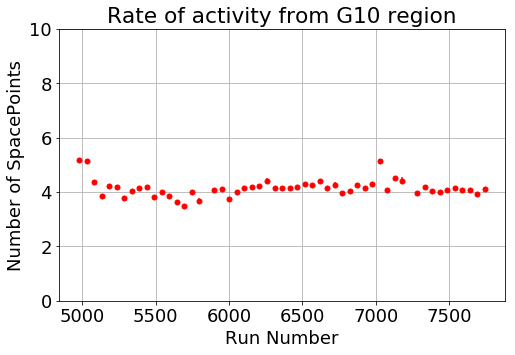

In [42]:
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (df_Event_beam_off.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_off.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query(G10_REGION) 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(8,5))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='off_run1-Beam Data')
plt.ylim(0,10)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Rate of activity from G10 region")
# plt.legend(loc=1)
plt.grid()
plt.show()


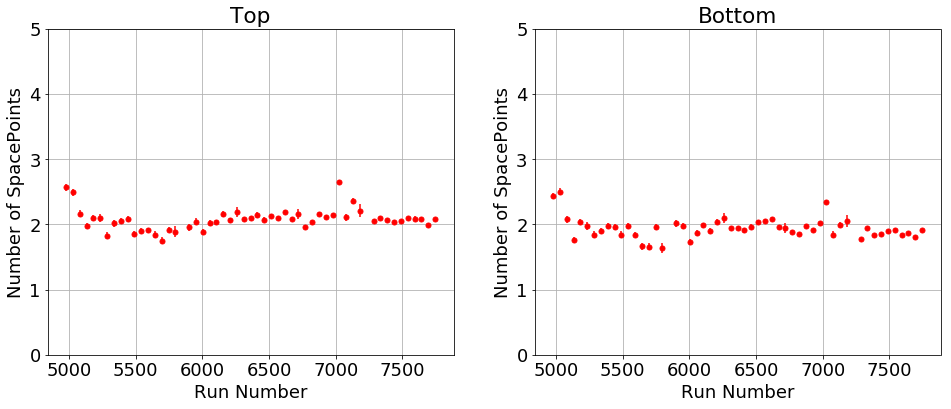

In [43]:
fig = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)


BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_top =N_G10_top.query(TOP)
    N_G10_top_shape =N_G10_top.shape[0]
    Rate = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)


plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
plt.ylim(0,5)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Top")

plt.grid()

plt.subplot(1, 2, 2)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_bottom =N_G10_bottom.query(BOTTOM)
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)

#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
plt.ylim(0,5)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Bottom")
#plt.legend(loc=1)
plt.grid()
plt.show()

In [44]:
import datetime as dt
import matplotlib.dates as md

<Figure size 432x432 with 0 Axes>

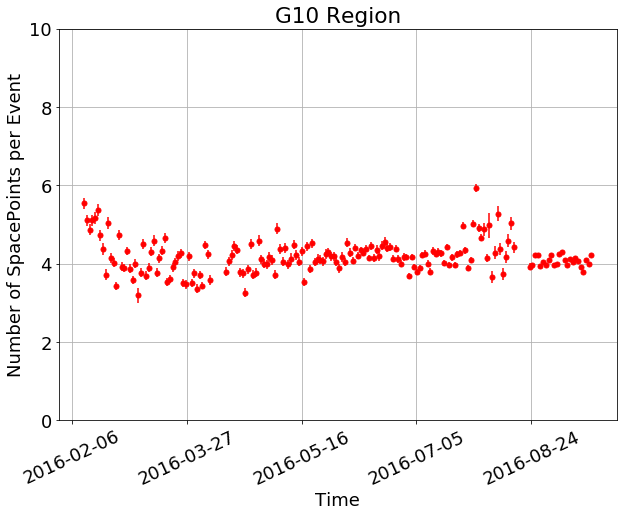

In [45]:
import datetime as dt
RUN_MIN = df_Event_beam_off['evttime'].min()
RUN_MAX = df_Event_beam_off['evttime'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/100000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event = (df_Event_beam_off.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10 = (df_Sps_beam_off.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query(G10_REGION)
    N_G10_timestamp=N_G10['evttime'].values
    N_G10_shape = N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)

    
fig = plt.figure(figsize=(10,8))    
df_date_time=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums=md.date2num(df_date_time)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='Run 3')

plt.xlabel('Time')
plt.ylabel('Number of SpacePoints per Event')
plt.title("G10 Region")
# plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,10)
plt.grid()
plt.show()
# fig.savefig('2018.png', dpi=400)

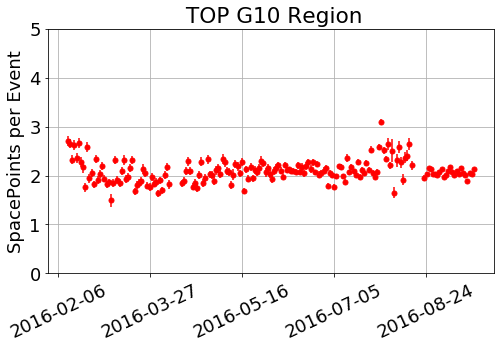

In [46]:
import datetime as dt
RUN_MIN = df_Event_beam_off['evttime'].min()
RUN_MAX = df_Event_beam_off['evttime'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/100000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event = (df_Event_beam_off.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_off.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query(TOP)
    N_G10_timestamp=N_G10['evttime'].values
    N_G10_shape = N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
    
    
    
fig = plt.figure(figsize=(8,6))    
df_date_time=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums=md.date2num(df_date_time)


xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('SpacePoints per Event')
plt.title(" TOP G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,5)
plt.grid()
plt.show()
# fig.savefig('Top.png', dpi=400)

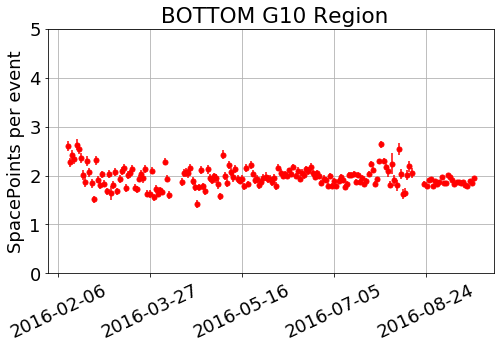

In [47]:
RUN_MIN = df_Event_beam_off['evttime'].min()
RUN_MAX = df_Event_beam_off['evttime'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/100000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event = (df_Event_beam_off.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_off.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query(BOTTOM)
    N_G10_timestamp=N_G10['evttime'].values
    N_G10_shape = N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
    
    
    
fig = plt.figure(figsize=(8,6))    
df_date_time=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums=md.date2num(df_date_time)



xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('SpacePoints per event')
plt.title(" BOTTOM G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,5)
plt.grid()
plt.show()
